In [1]:
from EntityResolutionEngine import EntityResolutionEngine as EntityResolutionEngine 
import main as sigmod
import similar_feature_grouping as similar_feature_grouping
import helper as helper
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gunesyurdakul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset_path="../datasets/2013_camera_specs/"

dataset_df = sigmod.create_brand_dataframe(dataset_path)
dataset_df = sigmod.compute_brand_blocking(dataset_df)

  0%|          | 0/24 [00:00<?, ?it/s]

>>> Creating dataframe...



100%|██████████| 24/24 [00:02<00:00,  7.32it/s]
428it [00:00, 4275.94it/s]

>>> Dataframe created successfully!

>>> Computing blocking...


29787it [00:05, 5237.69it/s]
29787it [00:04, 6161.00it/s]


ended
>>> Blocking computed successfully!



In [3]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')
same_products = sigmod.grouping_same_products_from_labelled_set(labelled_df)

#They all represent the same products
len(labelled_df)

297651

In [4]:
data_dict=sigmod.get_all_keys_values(dataset_path)
dataset_df['all_features'] = dataset_df['spec_id'].apply(lambda x: data_dict[x])

100%|██████████| 24/24 [00:13<00:00,  1.98it/s]


In [5]:
dataset_df = dataset_df.set_index('spec_id')

In [6]:
dataset_df

,source,spec_number,page_title,brand,blocking_key,all_features
spec_id,,,,,,
www.wexphotographic.com//154,www.wexphotographic.com,154,nikon coolpix aw120 digital camera - camouflag...,,coolpix,"{'battery model': 'en-el12', 'resolution': '46..."
www.wexphotographic.com//553,www.wexphotographic.com,553,canon ixus 150 digital camera - red (9148b007a...,,canon,"{'battery model': 'nb-11l', 'resolution': '460..."
www.wexphotographic.com//601,www.wexphotographic.com,601,fuji finepix s1 digital camera (p10nc12730a) -...,,fujifilm,"{'battery model': 'np-85', 'resolution': '4608..."
www.wexphotographic.com//197,www.wexphotographic.com,197,nikon coolpix s5300 digital camera - black (vn...,,coolpix,"{'battery model': 'en-el19', 'resolution': '46..."
www.wexphotographic.com//178,www.wexphotographic.com,178,fuji finepix s8600 digital camera - red (p10nc...,,fujifilm,"{'megapixels': '16', 'resolution': '4608 ã 34..."
...,...,...,...,...,...,...
www.canon-europe.com//23,www.canon-europe.com,23,canon powershot a560 - powershot and ixus digi...,,powershot,"{'flash exposure lock': 'yes', 'sound files': ..."
www.canon-europe.com//74,www.canon-europe.com,74,canon ixus 210 - powershot and ixus digital co...,,powershot,"{'cases straps': 'soft leather case dcc-1100,..."
www.canon-europe.com//62,www.canon-europe.com,62,canon ixus 125 hs - powershot and ixus digital...,,powershot,"{'cases straps': 'soft leather case dcc-1300,..."


In [7]:
from gensim.models import Word2Vec

In [ ]:
#run this only if you don't have the pretrained model 
all_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)
emb_dim=200
model = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)
model.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)
model.save('word2vec_200_features')

In [8]:
model= Word2Vec.load('word2vec_200_features')

****

In [9]:
entity_resolution_engine = EntityResolutionEngine(model,dataset_df,labelled_df)
entity_resolution_engine.set_model_words_column()

****

# Experimenting on Results for Each Block

In [10]:
blocking_key='panasonic'

In [11]:
entity_resolution_engine.set_block(blocking_key)

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['concat_wordvector']=''


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
len(entity_resolution_engine.block_df)

1321

### DIMENSIONALITY REDUCTION AND CLUSTERING

In [14]:
labels = entity_resolution_engine.run_TSNE()
assigned_clusters,T = entity_resolution_engine.run_DBSCAN(eps_=8, min_samples_=3)

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['inblock_cluster'] = self.assigned_clusters


****

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.scatter(T[:,0], T[:,1], c=assigned_clusters, cmap='hsv')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

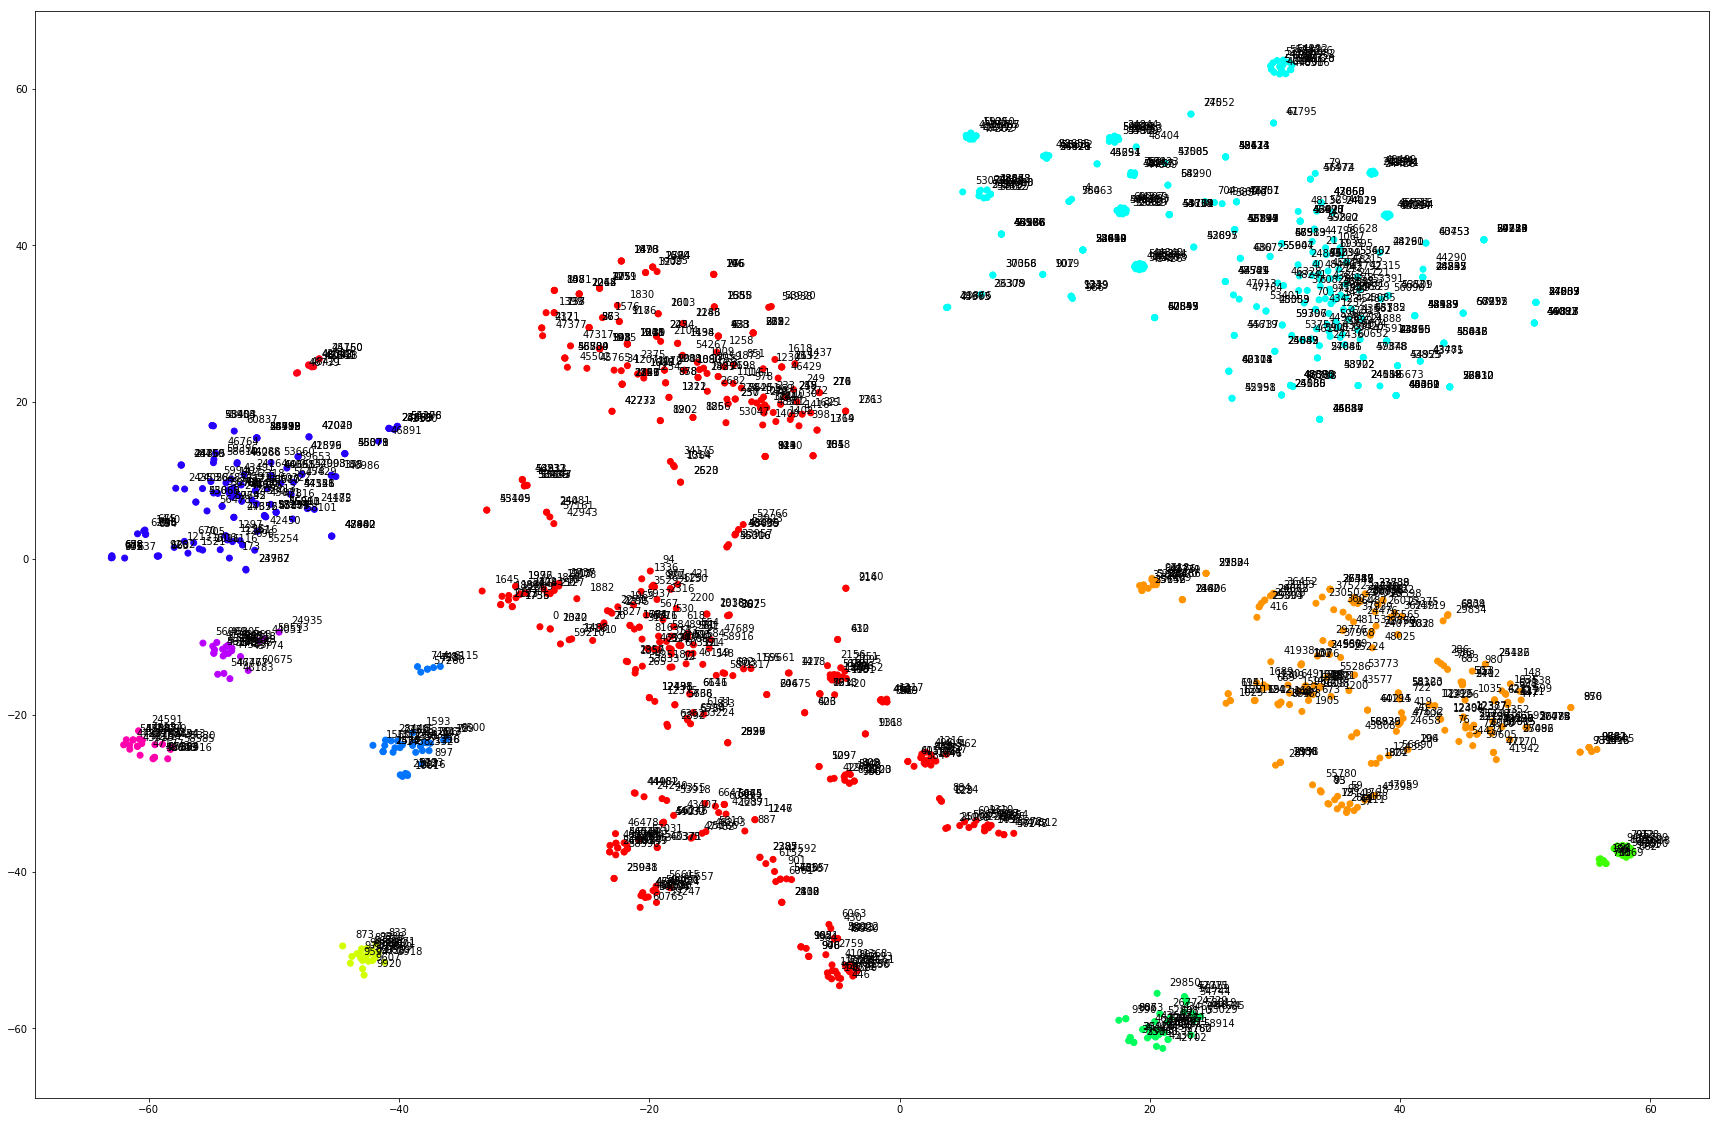

In [ ]:
plt.show()

In [ ]:
product_clusters, block_pairs_df = entity_resolution_engine.get_pairs(threshold=0.2)

In [ ]:
product_clusters

In [ ]:
block_pairs_df